# Final Project
The goal of the final project is to practice what we've learned in the class, on a real network dataset. You'll need to combine the intuition and framework of what we've learned during lectures with the toolset we've covered during computer labs. Plus, you'll be asked to creatively think about your dataset outside the scope of the tools you have. 

Your final project will be done in groups of 2-3 people (no exceptions for larger or smaller groups). Your presentation and writeup will be graded on the inclusion of the items in the following description. 

## Final Project Guidelines
For your final project, your team will be asked to complete the following tasks
* Decide what network you'd like to study. There are options and ideas below.
* Learn about the network dataset you've been assigned. Describe it for us. 
    * what are the nodes? the nodes are individual dolphins
        * How many nodes are there? 62 nodes
    * what are the edges? frequent associations between 62 dolphins in a community living off Doubtful Sound, New Zealand
        * How many edges are there? 159 edges
    * Is it weighted or unweighted? 
        * If weighted, what do the weights represent/mean?
    * directed or undirected? undirected
    * is it connected or disconnected? if disconnected, is there a giant component?
    * Is there anything interesting or weird about it?
    * What's the context of this network?
    * Do you have access to any metadata about the nodes?
* Create an adjacency matrix for your matrix using your `.csv` file
* Plot your network
* Find the most central node(s) in your network 
    * Do so for each of the four centrality metrics we've discussed in class. 
        * Plot your network with a different colour for each "most central" node
    * Do the centrality metrics identify different node(s) as the "most central"? 
    * Given the context of your dataset, interpret which centrality metric _you_ think is most informative. Explain.
* Find and plot the communities in your network
    * We've only discussed one graph partitioning algorithm to do this: Girvan-Newman. 
    * Do the identified communities make sense given the context of your data?
* Report on and interpret one more attribute of the data. Examples are:
    * Average (in/out-)degree
    * Average clustering coefficient
    * Degree distribution 
    * Average shortest path
    * [Anything documented here](https://networkx.org/documentation/stable/reference/algorithms/index.html)
        * NOTE: If you report on an attribute of the data that we have _not_ covered in class, you are expected to _understand it_ well enough to describe it to the class. You are welcome to come to my office hours to discuss this, or to make an appointment with me. Most of the `networkx` documentation includes a description of the method/metric/algorithm
* Conclude
    * Do you think about this dataset differently than you did before? 
    * Did you learn anything about the discipline/domain the network lies in?
    * What's something you wish you could learn about the network that you might not have a tool for?
    * Is there any metadata about the nodes/edges that you wish you could have to interpret your findings better?

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Final Report
Your final report should address each of the points above and should include the code you wrote and the plots you got for each section. You should write this final report in a Jupyter Notebook, which you then download as a pdf compiled with LaTeX. If you don't have LaTeX on your machine, you can also do File -> Download As -> LaTeX. Then open the downloaded LaTeX file with a basic text editor, and copy and paste it into [Overleaf](https://www.overleaf.com/). 

You should submit your compiled report to one team member's GitHub by 1PM on Thursday, February 2. Tag `@izabel-aguiar` and your team members' GitHub account tags in the description of the commit. 

# Final Presentation
Your team will be asked to give a 10 minute presentation of your findings to the class on our last day, February 2. Bring one team member's computer for sharing the presentation. If you don't feel you'll have time to present all your findings, you may pick a few that you find most interesting. 

In [3]:
dolphin_graph = nx.read_gml('dolphins.gml')

159


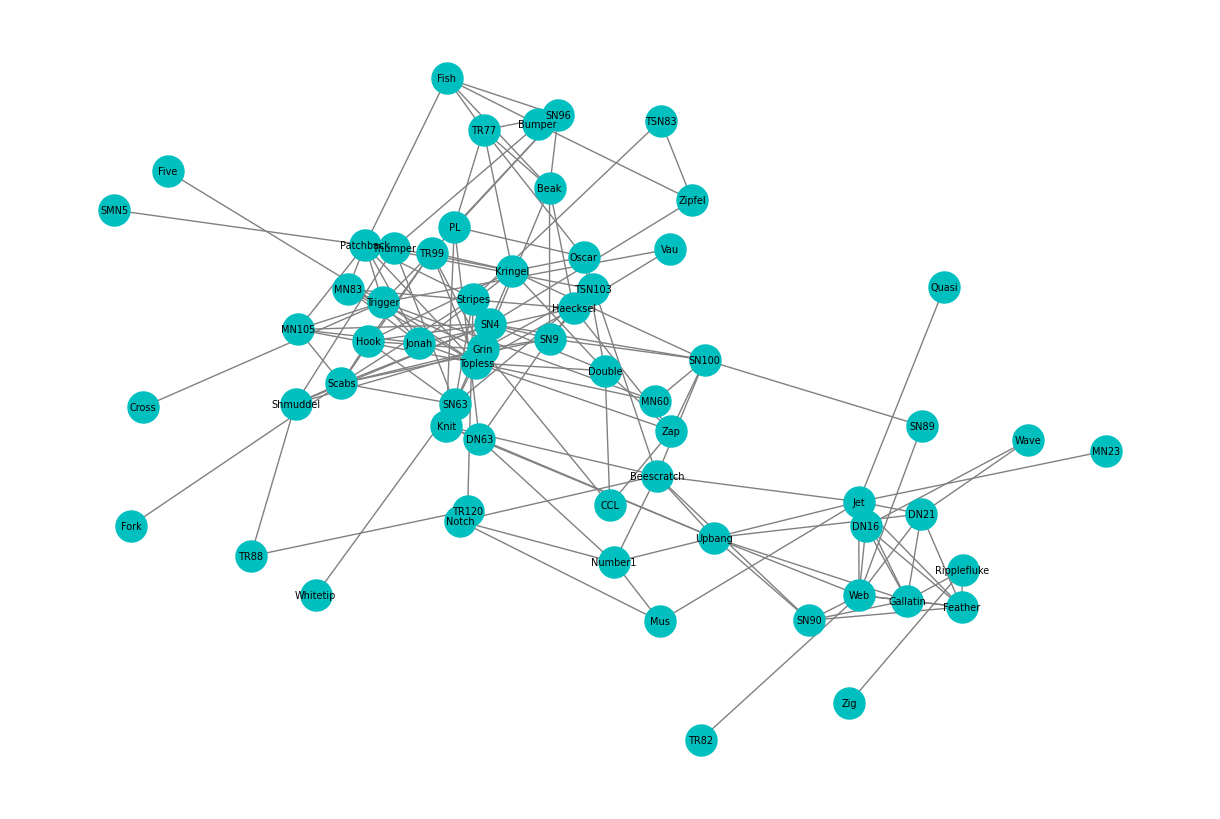

In [4]:
pos=nx.spring_layout(dolphin_graph, k=0.5)
plt.figure(figsize=(12,8))
nx.draw(dolphin_graph, pos, node_color='c', node_size=500, edge_color='gray',font_size=7, with_labels=True)
print(dolphin_graph.number_of_edges())

In [5]:
N = len(dolphin_graph)
print(N)

62


Centrality:

In [8]:
deg_cen = nx.degree_centrality(dolphin_graph)
close_cen = nx.closeness_centrality(dolphin_graph)
eig_cen = nx.eigenvector_centrality(dolphin_graph)
bet_cen = nx.betweenness_centrality(dolphin_graph)

print('The dolphin with highest degree centrality is', max(deg_cen, key=lambda key: deg_cen[key]))
print('The dolphin with highest closeness centrality is', max(close_cen, key=lambda key: close_cen[key]))
print('The dolphin with highest eigenvector centrality is', max(eig_cen, key=lambda key: eig_cen[key]))
print('The dolphin with highest betweenness centrality is', max(bet_cen, key=lambda key: bet_cen[key]))

The dolphin with highest degree centrality is Grin
The dolphin with highest closeness centrality is SN100
The dolphin with highest eigenvector centrality is Grin
The dolphin with highest betweenness centrality is SN100


Coloring central nodes a different color:

In [27]:
name_dictionary= {
    0: "Grin",
    1: "SN100"
                 }

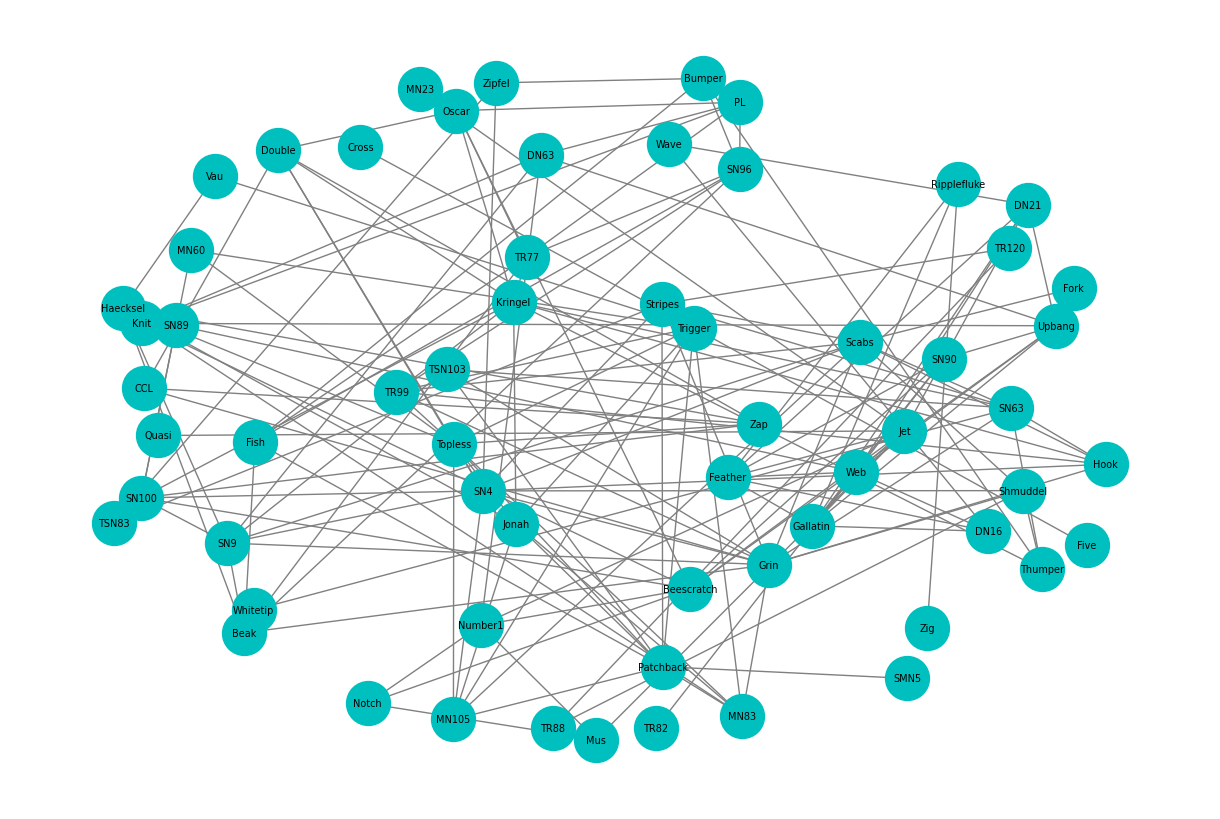

In [21]:
len(dolphin_graph)
colors = ['c'] * len(dolphin_graph)
colors[0] = 'm'
colors[1]='r'
pos=nx.spring_layout(dolphin_graph,k=1.5)
plt.figure(figsize=(12,8))
nx.draw(dolphin_graph, pos, node_color='c', node_size=1000, edge_color='gray',font_size=7, with_labels=True)

adjacency matrix:

In [11]:
folder = ""
file = "dolphins"
ext = ".npy"
dolphins = np.load(folder+file+ext)

print(dolphins)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


Graph partitioning:

In [31]:
from networkx.algorithms.community import girvan_newman
comm = girvan_newman(dolphin_graph)
gn_communities = tuple(sorted(eig_cen) for eig_cen in next(comm))

In [33]:
def switch_to_numbers(G, C):
    num_comm = len(C)
    a = []
    for c in range(num_comm):
        a.append([0])
    for i, node in enumerate(G.nodes()):
        for j in range(num_comm):
            if node in C[j]:
                a[j].append(i)
    for c in range(num_comm):
        a[c] = a[c][1:]
    return a

In [70]:
import matplotlib.cm as cmx
def Plot_Comm(Network, C, position = None):
    cmap = cmx.get_cmap(name='rainbow')
    N = len(Network.nodes())
    K = len(C)
    color_map = ['k']*N
    for i in range(K):
        for j in range(len(C[i])):
            color_map[ C[i][j] ] = cmap(i/K)
    if position is None:
        pos = nx.spring_layout(Network, k=5,iterations=20)
    else:
        pos = position
    fig = plt.figure(figsize=(12,8))
    nx.draw(Network, pos, node_color=color_map, node_size=1000, edge_color='grey', font_size = 8, with_labels=True)
    plt.show()
    return

In [36]:
gn_communities_num = switch_to_numbers(dolphin_graph, gn_communities)

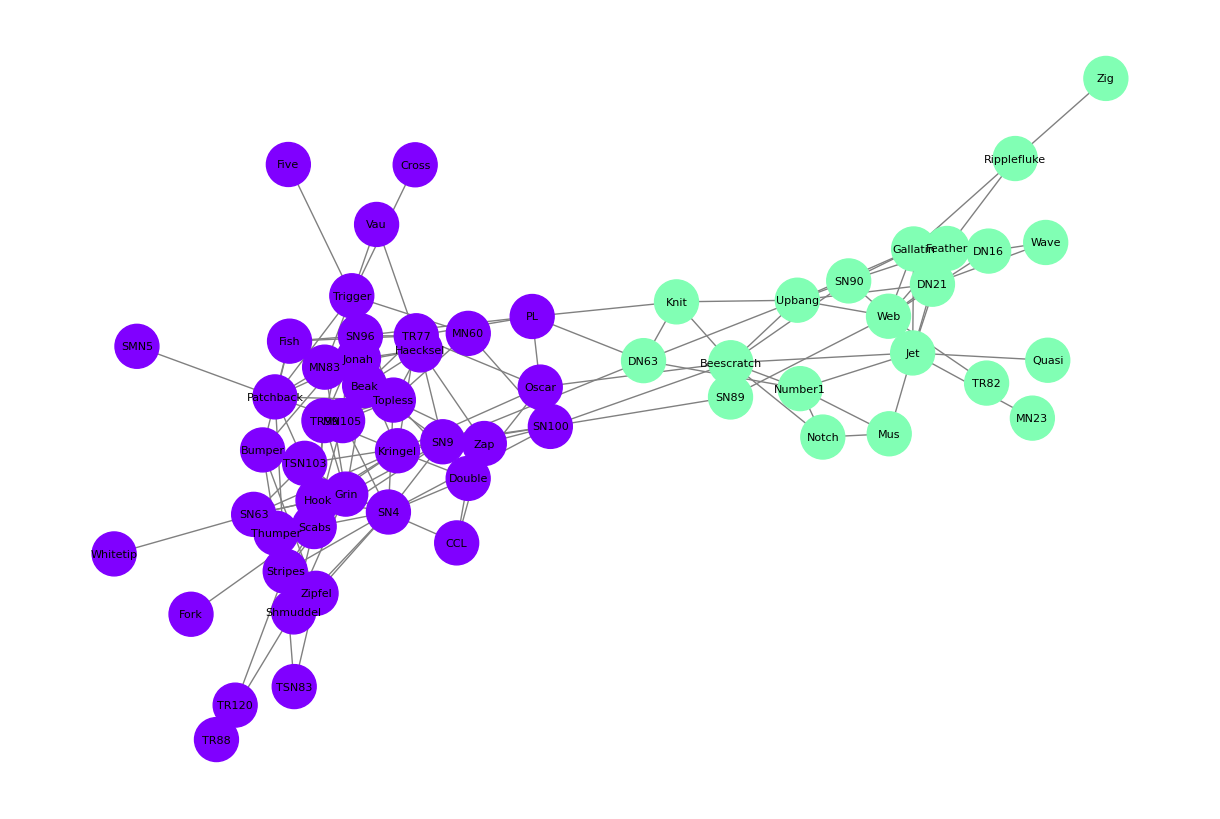

In [76]:
Plot_Comm(dolphin_graph, gn_communities_num, nx.spring_layout(dolphin_graph))

Clustering Coefficient

In [48]:
clustering = nx.algorithms.clustering(dolphin_graph)
print('The node with lowest clustering coefficient is', min(clustering, key=lambda key: clustering[key]))

print('also:')

print('Five, Fork, MN23, Quasi, SMN5, SN89, TR82, TR88, TR120, TSN83, Vau, Wave, Whitetip, Zig')

print(' ')

print('The nodes with the highest clustering coefficient are', max(clustering, key=lambda key: clustering[key]), 'and Notch')
print(' ')
average_cc = nx.algorithms.average_clustering(dolphin_graph)
print('The average clustering coefficient for the dolphin network is ', average_cc)

The node with lowest clustering coefficient is Cross
also:
Five, Fork, MN23, Quasi, SMN5, SN89, TR82, TR88, TR120, TSN83, Vau, Wave, Whitetip, Zig
 
The nodes with the highest clustering coefficient are Mus and Notch
 
The average clustering coefficient for the dolphin network is  0.2589582460550202
